### 필수과제1
- wine_test 셋을 가지고 kmeans를 진행해서 3개의 군집 외에 다른 군집들은 어떻게 평가할 수 있는지? 위의 수업 코드로 확인하기!

In [1]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import DBSCAN
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/Users/t2023-m0093/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv('wine_test.csv')
df

,Unnamed: 0,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,1,NaN,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [3]:
df = df.fillna('Nan')
df

,Unnamed: 0,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,1,Nan,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.3,2.81,5.68,1.03,3.17,1185,0
3,3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,174,13.4,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [4]:
for i in range(len(df)):
    if df['alcohol'][i] == 'Nan':
        a = df['class'][i]
        b = []
        for j in range(len(df)):
            if df['class'][j] == a:
                if df['alcohol'][j] != 'Nan':
                    b.append(df['alcohol'][j])
        c = sum(b)/len(b)
        df['alcohol'][i] = c
            
for i in range(len(df)):
    if df['nonflavanoid_phenols'][i] == 'Nan':
        a = df['class'][i]
        b = []
        for j in range(len(df)):
            if df['class'][j] == a:
                if df['nonflavanoid_phenols'][j] != 'Nan':
                    b.append(df['nonflavanoid_phenols'][j])
        c = sum(b)/len(b)
        df['nonflavanoid_phenols'][i] = c

/var/folders/kn/qnjl17gs6tvgr8yxlz_6mfxc0000gn/T/ipykernel_99631/914014761.py:10: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['alcohol'][i] = c
/var/folders/kn/qnjl17gs6tvgr8yxlz_6mfxc0000gn/T/ipykernel_99631/914014761.py:10: SettingWit

In [5]:
df = df.drop('Unnamed: 0', axis = 1)
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.735263,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.3,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.4,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [6]:
mns = MinMaxScaler()
df_sp = mns.fit_transform(df)
df_sp

array([[0.86021505, 0.1916996 , 0.57219251, ..., 0.97069597, 0.56134094,
        0.        ],
       [0.72722128, 0.2055336 , 0.4171123 , ..., 0.78021978, 0.55064194,
        0.        ],
       [0.57258065, 0.3201581 , 0.70053476, ..., 0.6959707 , 0.64693295,
        0.        ],
       ...,
       [0.60215054, 0.69960474, 0.48128342, ..., 0.10622711, 0.39728959,
        1.        ],
       [0.57526882, 0.36561265, 0.54010695, ..., 0.12820513, 0.40085592,
        1.        ],
       [0.83333333, 0.66403162, 0.73796791, ..., 0.12087912, 0.20114123,
        1.        ]])

In [7]:
df_sp2 = pd.DataFrame(data =df_sp, columns =df.columns)

In [8]:
kmeans1 = KMeans(
            init='k-means++',
            n_clusters = 3,
            n_init= 10,
            max_iter = 200,
            random_state=111)

In [9]:
kmeans1

KMeans(max_iter=200, n_clusters=3, n_init=10, random_state=111)

In [10]:
kmeans1.fit(df_sp2)

KMeans(max_iter=200, n_clusters=3, n_init=10, random_state=111)

In [11]:
print(kmeans1.inertia_)

49.86224091786593


In [12]:
Elbow_ch=KElbowVisualizer(kmeans1)

<Axes: >

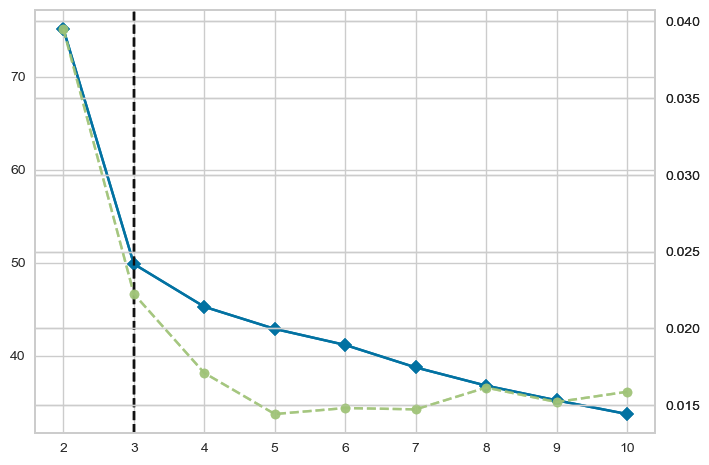

In [13]:
Elbow_ch.fit(df_sp2)
Elbow_ch.draw()

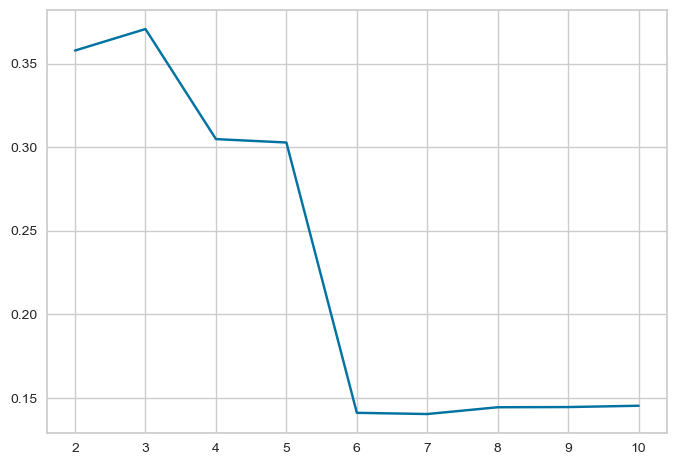

In [15]:
kmeans1 = {'init' : 'k-means++',
            'n_init' : 10,
            'max_iter' :200,
            'random_state': 111}

silhouette_coef = []

for i in range(2,11):
    kmeans_sil = KMeans(n_clusters=i, **kmeans1)
    kmeans_sil.fit(df_sp2)
    score = silhouette_score(df_sp2, kmeans_sil.labels_)
    silhouette_coef.append(score)
    
plt.plot(range(2,11),silhouette_coef )
plt.xticks(range(2,11))
plt.show()

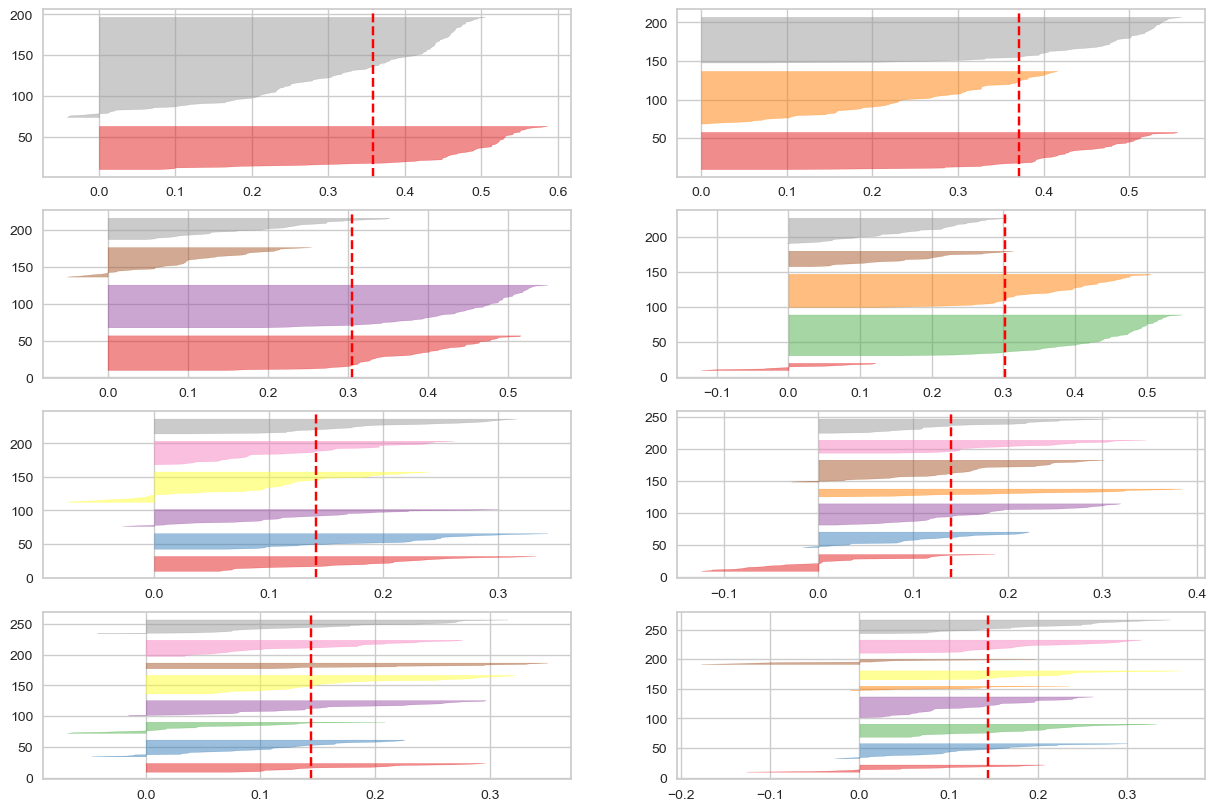

In [17]:
fig, ax = plt.subplots(4,2, figsize=(15,10))

for i in [2,3,4,5,6,7,8,9]:
    kmeans2 = KMeans(init='k-means++',
                    n_clusters = i,
                    n_init= 10,
                    max_iter = 200,
                    random_state=111)
    q, mod = divmod(i,2)
    visual = SilhouetteVisualizer(kmeans2, color = 'yellowbricks', ax=ax[q-1][mod])
    visual.fit(df_sp2)

In [18]:
kmeans1 = KMeans(
            init='k-means++',
            n_clusters = 3,
            n_init= 10,
            max_iter = 200,
            random_state=111)

In [19]:
kmeans1.fit_predict(df_sp2)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [21]:
df_sp2['kmeans_n'] = kmeans1.fit_predict(df_sp2)

In [22]:
df_sp2.groupby('kmeans_n')['alcohol'].mean().to_frame()

,alcohol
kmeans_n,
0,0.570331
1,0.329905
2,0.723882
